In [1]:
from blue_conduit_spatial.utilities import load_datasets
from blue_conduit_spatial.evaluation import CostsHandler

data_dir = '../../data'
load_dir = f'{data_dir}/Processed'
pred_dir = f'{data_dir}/Predictions'

# Load data for all hexagons resolutions, train sizes and splits
Xdata, Ydata, location, train_pid, test_pid, partitions_builder = load_datasets(load_dir)

In [2]:
type(partitions_builder)

gizmo.spatial_partitions.partitions.PartitionsBuilder

In [3]:
# models_prefix = ['baseline', 'diffusion', 'GP', 'GP_spatiotemporal', 'GP_spatiotemporal_var', 'GPvar', 
#                'GraphSAGE', 'stacking']

In [2]:
ts_list = [0.1,0.3,0.4,0.6,0.7,0.9]
res_list = [5,10,22,47,99]
models_costs = ['baseline', 'diffusion', 'stacking', 'GP_spatiotemporal']
costs_handler = CostsHandler(Ydata, train_pid, test_pid, partitions_builder, pred_dir, models_costs, bl_prefix='baseline')

2021-12-11 21:25.26 [info     ] Generating the partition map of type 'hexagon'


100%|██████████████████████████████████████| 289/289 [00:00<00:00, 17017.94it/s]

2021-12-11 21:25.29 [info     ] Tesselate() is performing gpd.sjoin() to remove partitions that contain no parcels.
2021-12-11 21:25.29 [info     ] Building the partition-parcel lookup table with add_partition_ID_via_sjoin()



/Users/Javiera/Desktop/Harvard/MS/Classes/Third Term/AC297r/teamBlueConduit/gizmo/gizmo/spatial_partitions/partitions.py:112: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.partition_gdf, self.parcel_gdf = partition_utils.tesselate(


2021-12-11 21:25.31 [debug    ] Total parcels after join: 26857
2021-12-11 21:25.31 [info     ] Building the connected graph on the partitions.
2021-12-11 21:25.32 [info     ] New Partition dataframe of type 'hexagon' created, using at least 16.16 MB of memory
Digging data computation for ts:0.1, n_hexagons:22 done. | Total time: 27.56 s.


/Users/Javiera/.conda/envs/ac297r-test4/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


Costs computation for ts:0.1, n_hexagons:22 done. | Total time: 13.42 s.


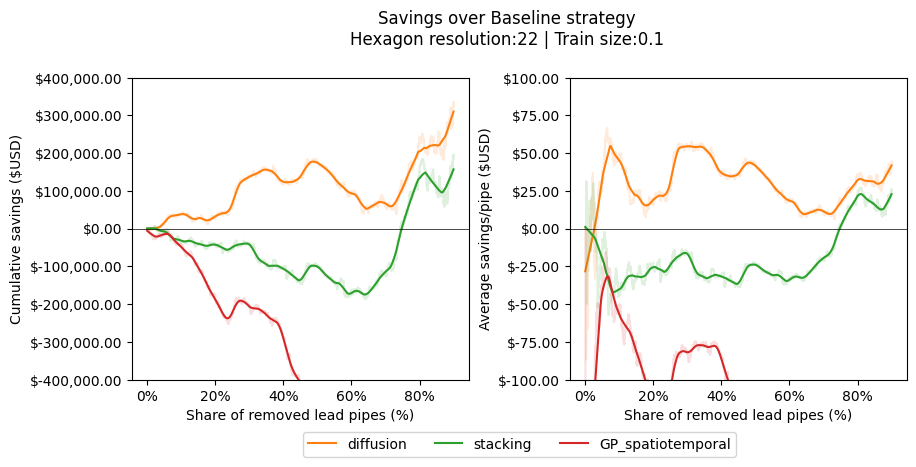

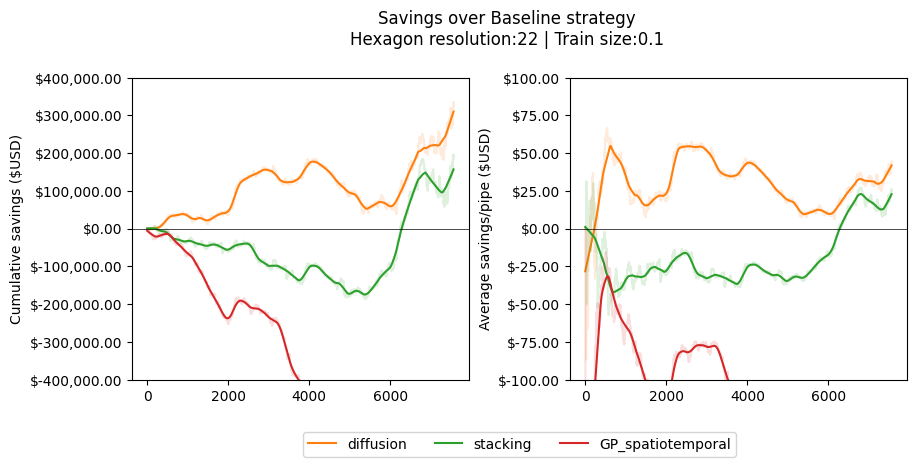

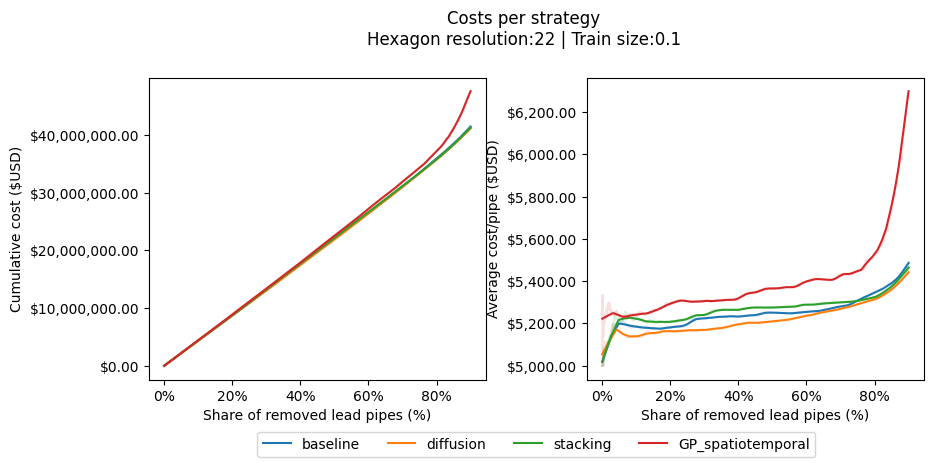

In [1]:
from blue_conduit_spatial.utilities import load_datasets
from blue_conduit_spatial.evaluation import CostsHandler

data_dir = '../../data'
load_dir = f'{data_dir}/Processed'
pred_dir = f'{data_dir}/Predictions'

# Load data for all hexagons resolutions, train sizes and splits
Xdata, Ydata, location, train_pid, test_pid, partitions_builder = load_datasets(load_dir)
models_costs = ['baseline', 'diffusion', 'stacking', 'GP_spatiotemporal']
costs_handler = CostsHandler(Ydata, train_pid, test_pid, partitions_builder, pred_dir, models_costs, bl_prefix='baseline')
costs_handler.plot_costs(res=22, ts=0.1, savefig=True, norm_x=True, plot_dir='../../plots/savings', metric='savings', zoom_perc=0.9)
costs_handler.plot_costs(res=22, ts=0.1, savefig=True, norm_x=False, plot_dir='../../plots/savings', metric='savings', zoom_perc=0.9)
costs_handler.plot_costs(res=22, ts=0.1, savefig=True, norm_x=True, plot_dir='../../plots/savings', metric='cost', zoom_perc=0.9)

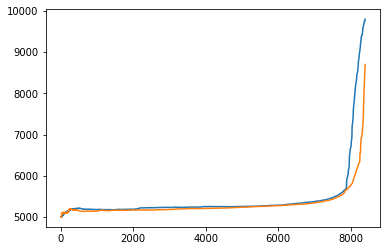

In [13]:
plt.plot(costs_handler.costs['ts_0.1']['res_22']['baseline']['cost_avg'])
plt.plot(costs_handler.costs['ts_0.1']['res_22']['diffusion']['cost_avg'])
plt.show()

2021-12-12 22:41.27 [info     ] Generating the partition map of type 'hexagon'


100%|██████████████████████████████████████| 289/289 [00:00<00:00, 12266.53it/s]

2021-12-12 22:41.30 [info     ] Tesselate() is performing gpd.sjoin() to remove partitions that contain no parcels.
2021-12-12 22:41.30 [info     ] Building the partition-parcel lookup table with add_partition_ID_via_sjoin()



/Users/Javiera/Desktop/Harvard/MS/Classes/Third Term/AC297r/teamBlueConduit/gizmo/gizmo/spatial_partitions/partitions.py:112: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.partition_gdf, self.parcel_gdf = partition_utils.tesselate(


2021-12-12 22:41.32 [debug    ] Total parcels after join: 26857
2021-12-12 22:41.32 [info     ] Building the connected graph on the partitions.
2021-12-12 22:41.32 [info     ] New Partition dataframe of type 'hexagon' created, using at least 16.16 MB of memory
Digging data computation for ts:0.6, n_hexagons:22 done. | Total time: 12.63 s.


/Users/Javiera/.conda/envs/ac297r-test4/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


Costs computation for ts:0.6, n_hexagons:22 done. | Total time: 6.19 s.


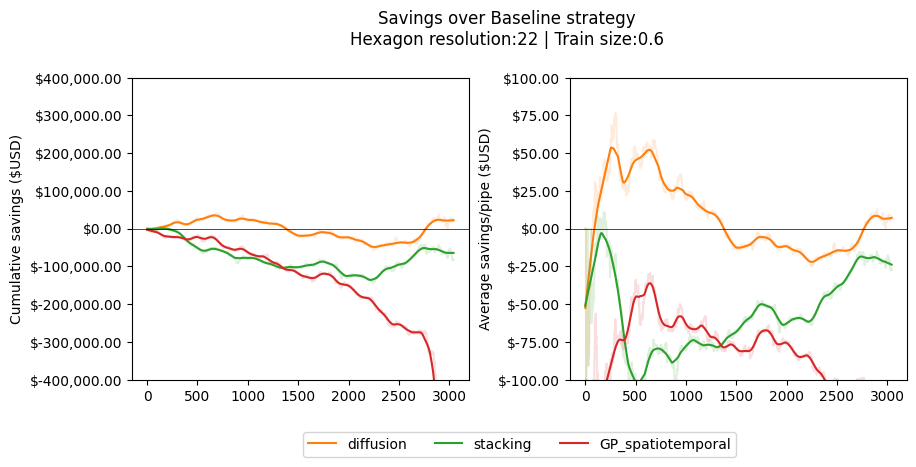

In [3]:
costs_handler.plot_costs(res=22, ts=0.6, savefig=True, norm_x=False, plot_dir='../../plots/savings')

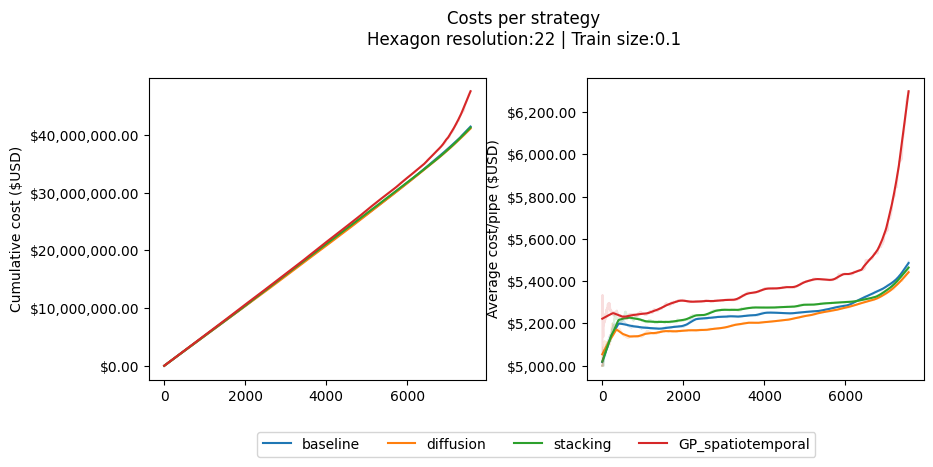

In [6]:
costs_handler.plot_costs(res=22, ts=0.1, savefig=True, norm_x=False, plot_dir='../../plots/savings', metric='cost')

In [5]:
costs_handler.compute_costs(res_list=res_list, ts_list=ts_list)
for res in res_list:
    for ts in ts_list:
        costs_handler.plot_costs(res=res, ts=ts, savefig=True, norm_x=False, plot_dir='../../plots/savings', metric='savings', zoom_perc=0.9)

2021-12-12 22:33.50 [info     ] Generating the partition map of type 'hexagon'


100%|████████████████████████████████████████| 77/77 [00:00<00:00, 15080.38it/s]

2021-12-12 22:33.52 [info     ] Tesselate() is performing gpd.sjoin() to remove partitions that contain no parcels.
2021-12-12 22:33.52 [info     ] Building the partition-parcel lookup table with add_partition_ID_via_sjoin()



/Users/Javiera/Desktop/Harvard/MS/Classes/Third Term/AC297r/teamBlueConduit/gizmo/gizmo/spatial_partitions/partitions.py:112: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.partition_gdf, self.parcel_gdf = partition_utils.tesselate(


2021-12-12 22:33.54 [debug    ] Total parcels after join: 26857
2021-12-12 22:33.54 [info     ] Building the connected graph on the partitions.
2021-12-12 22:33.54 [info     ] New Partition dataframe of type 'hexagon' created, using at least 16.99 MB of memory
2021-12-12 22:33.55 [info     ] Generating the partition map of type 'hexagon'


100%|██████████████████████████████████████| 289/289 [00:00<00:00, 22537.44it/s]

2021-12-12 22:33.58 [info     ] Tesselate() is performing gpd.sjoin() to remove partitions that contain no parcels.
2021-12-12 22:33.58 [info     ] Building the partition-parcel lookup table with add_partition_ID_via_sjoin()



/Users/Javiera/Desktop/Harvard/MS/Classes/Third Term/AC297r/teamBlueConduit/gizmo/gizmo/spatial_partitions/partitions.py:112: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.partition_gdf, self.parcel_gdf = partition_utils.tesselate(


2021-12-12 22:34.00 [debug    ] Total parcels after join: 26857
2021-12-12 22:34.00 [info     ] Building the connected graph on the partitions.
2021-12-12 22:34.00 [info     ] New Partition dataframe of type 'hexagon' created, using at least 16.16 MB of memory
2021-12-12 22:34.02 [info     ] Generating the partition map of type 'hexagon'


100%|████████████████████████████████████| 1138/1138 [00:00<00:00, 28400.43it/s]

2021-12-12 22:34.04 [info     ] Tesselate() is performing gpd.sjoin() to remove partitions that contain no parcels.
2021-12-12 22:34.04 [info     ] Building the partition-parcel lookup table with add_partition_ID_via_sjoin()



/Users/Javiera/Desktop/Harvard/MS/Classes/Third Term/AC297r/teamBlueConduit/gizmo/gizmo/spatial_partitions/partitions.py:112: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.partition_gdf, self.parcel_gdf = partition_utils.tesselate(


2021-12-12 22:34.06 [debug    ] Total parcels after join: 26857
2021-12-12 22:34.07 [info     ] Building the connected graph on the partitions.
2021-12-12 22:34.09 [info     ] New Partition dataframe of type 'hexagon' created, using at least 14.37 MB of memory
2021-12-12 22:34.11 [info     ] Generating the partition map of type 'hexagon'


100%|████████████████████████████████████| 4828/4828 [00:00<00:00, 27993.61it/s]


2021-12-12 22:34.13 [info     ] Tesselate() is performing gpd.sjoin() to remove partitions that contain no parcels.
2021-12-12 22:34.13 [info     ] Building the partition-parcel lookup table with add_partition_ID_via_sjoin()


/Users/Javiera/Desktop/Harvard/MS/Classes/Third Term/AC297r/teamBlueConduit/gizmo/gizmo/spatial_partitions/partitions.py:112: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  self.partition_gdf, self.parcel_gdf = partition_utils.tesselate(


2021-12-12 22:34.16 [debug    ] Total parcels after join: 26857
2021-12-12 22:34.16 [info     ] Building the connected graph on the partitions.
2021-12-12 22:34.35 [info     ] New Partition dataframe of type 'hexagon' created, using at least 10.95 MB of memory
Digging data computation for ts:0.1, n_hexagons:10 done. | Total time: 12.26 s.
Digging data computation for ts:0.1, n_hexagons:22 done. | Total time: 31.87 s.
Digging data computation for ts:0.1, n_hexagons:47 done. | Total time: 66.09 s.


KeyboardInterrupt: 

In [ ]:
import pickle

costs_path = '../../plots/savings/costs.pk'

with open(costs_path, 'wb') as f: 
    pickle.dump(costs_handler.costs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(costs_path, 'rb') as f:
    costs_load = pickle.load(f)